# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime,timedelta

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

# Load Audio

In [3]:
audio = glob('../Audio Emotion/Audio/*/*.mp3')

In [10]:
# Sample
y, sr = librosa.load(audio[0])

print(f'''nilai y = {y[0:5]}
y shape = {y.shape}
sample rate = {sr}''')

nilai y = [0.00994092 0.01638428 0.01675772 0.01921479 0.01950265]
y shape = (78057,)
sample rate = 22050


# Extract MFCC Audio

MFCC adalah singkatan dari Mel Frequency Cepstral Coefficients, yaitu salah satu jenis fitur yang umum digunakan dalam pengolahan sinyal suara. Fitur MFCC menggambarkan karakteristik spektral dari sinyal suara dan sering digunakan dalam pengenalan suara, deteksi emosi, dan aplikasi pengolahan suara lainnya.

1. Proses ekstraksi MFCC melibatkan beberapa tahapan, antara lain:

2. Pre-Emphasis: Peningkatan amplitudo frekuensi tinggi untuk meningkatkan rasio sinyal-suara dan mengurangi dampak dari noise.

3. Frame Blocking: Sinyal suara dibagi menjadi beberapa frame yang lebih kecil untuk memudahkan analisis.

4. Windowing: Setiap frame sinyal suara dikalikan dengan fungsi jendela untuk mengurangi efek dari transisi antara frame yang berdekatan.

5. Fast Fourier Transform (FFT): Setiap frame sinyal suara diubah ke dalam domain frekuensi menggunakan FFT.

6. Mel Filterbank: Proses ini membagi spektrum frekuensi menjadi beberapa sub-bagian, yang ditentukan oleh kurva filter Mel.

7. Logarithmic Compression: Setiap nilai dalam sub-bagian tersebut diambil logaritma untuk meningkatkan sensitivitas pada perbedaan kecil dalam sinyal suara.

8. Discrete Cosine Transform (DCT): Setiap nilai logaritma kemudian diubah ke dalam domain cepstral menggunakan DCT.

Hasil dari proses ekstraksi fitur MFCC adalah vektor MFCC, yaitu kumpulan nilai-nilai cepstral yang merepresentasikan karakteristik sinyal suara. Vektor MFCC dapat digunakan sebagai input untuk model machine learning dalam pengenalan suara dan aplikasi pengolahan suara lainnya.

# Audio Dataframe

In [14]:
# Dataframe Kosong
df = pd.DataFrame(columns=['file_name', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 
                           'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                           'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20','duration'])

# List Kosong
file_name = []
dur = []

# Array Kosong
mfcc_all = np.empty((20,0))

In [15]:
# Looping Audio File
for x in range(len(audio)):
    y, sr = librosa.load(audio[x])
    name = audio[x][-12:]
  
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    duration = y.shape[0]/sr
    d = duration/mfcc.shape[1]
    for i in range(mfcc.shape[1]):
        dur += [(datetime.utcfromtimestamp(d*(i+1)).strftime('%M:%S:%f')[:-3])]

    mfcc_all = np.hstack((mfcc_all, mfcc))
    file_name += [name]*mfcc.shape[1]
         

In [33]:
# Audio Data
df['file_name'] = file_name
df['duration'] = dur

(df['mfcc1'], df['mfcc2'], df['mfcc3'], df['mfcc4'], df['mfcc5'], df['mfcc6'], 
 df['mfcc7'], df['mfcc8'], df['mfcc9'], df['mfcc10'], df['mfcc11'], df['mfcc12'], 
 df['mfcc13'], df['mfcc14'], df['mfcc15'], df['mfcc16'], df['mfcc17'], df['mfcc18'], 
 df['mfcc19'], df['mfcc20']) = (mfcc_all[0], mfcc_all[1], mfcc_all[2], mfcc_all[3], mfcc_all[4], 
                                mfcc_all[5], mfcc_all[6], mfcc_all[7], mfcc_all[8], mfcc_all[9], 
                                mfcc_all[10], mfcc_all[11], mfcc_all[12], mfcc_all[13], mfcc_all[14],
                                mfcc_all[15], mfcc_all[16], mfcc_all[17], mfcc_all[18], mfcc_all[19])

# Emotion Label
df['bahagia'] = np.zeros(len(df['mfcc1']))
df['jijik'] = np.zeros(len(df['mfcc1']))
df['marah'] = np.zeros(len(df['mfcc1']))
df['sedih'] = np.zeros(len(df['mfcc1']))
df['takut'] = np.zeros(len(df['mfcc1']))
df['terkejut'] = np.zeros(len(df['mfcc1']))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  1794 non-null   object 
 1   mfcc1      1794 non-null   float64
 2   mfcc2      1794 non-null   float64
 3   mfcc3      1794 non-null   float64
 4   mfcc4      1794 non-null   float64
 5   mfcc5      1794 non-null   float64
 6   mfcc6      1794 non-null   float64
 7   mfcc7      1794 non-null   float64
 8   mfcc8      1794 non-null   float64
 9   mfcc9      1794 non-null   float64
 10  mfcc10     1794 non-null   float64
 11  mfcc11     1794 non-null   float64
 12  mfcc12     1794 non-null   float64
 13  mfcc13     1794 non-null   float64
 14  mfcc14     1794 non-null   float64
 15  mfcc15     1794 non-null   float64
 16  mfcc16     1794 non-null   float64
 17  mfcc17     1794 non-null   float64
 18  mfcc18     1794 non-null   float64
 19  mfcc19     1794 non-null   float64
 20  mfcc20  

# Audio Labeling

In [11]:
filter_004_01 = ((df["file_name"] == "audio004.mp3") & 
                 (df["duration"] >= "00:00:065") & 
                 (df["duration"] <= "00:00:720"))
df.loc[filter_004_01, 'bahagia'] = 3

filter_004_02 = ((df["file_name"] == "audio004.mp3") &
                 (df["duration"] > "00:00:720") &
                 (df["duration"] <= "00:01:250"))
df.loc[filter_004_02, 'bahagia'] = 2

In [16]:
df.loc[filter_004_01]

,file_name,amplitude,duration,sample_rate,bahagia,jijik,marah,sedih,takut,terkejut
1433,audio004.mp3,0.132066,00:00:065,22050,3.0,0.0,0.0,0.0,0.0,0.0
1434,audio004.mp3,0.155887,00:00:065,22050,3.0,0.0,0.0,0.0,0.0,0.0
1435,audio004.mp3,0.167953,00:00:065,22050,3.0,0.0,0.0,0.0,0.0,0.0
1436,audio004.mp3,0.161966,00:00:065,22050,3.0,0.0,0.0,0.0,0.0,0.0
1437,audio004.mp3,0.148609,00:00:065,22050,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
15893,audio004.mp3,-0.059873,00:00:720,22050,3.0,0.0,0.0,0.0,0.0,0.0
15894,audio004.mp3,-0.025740,00:00:720,22050,3.0,0.0,0.0,0.0,0.0,0.0
15895,audio004.mp3,-0.021418,00:00:720,22050,3.0,0.0,0.0,0.0,0.0,0.0
15896,audio004.mp3,-0.047446,00:00:720,22050,3.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df[df['file_name']== 'audio003.mp3'].tail(5)

,file_name,amplitude,duration,sample_rate,bahagia,jijik,marah,sedih,takut,terkejut
176850,audio003.mp3,-0.003810,00:04:480,22050,0.0,0.0,0.0,0.0,0.0,0.0
176851,audio003.mp3,-0.005440,00:04:480,22050,0.0,0.0,0.0,0.0,0.0,0.0
176852,audio003.mp3,-0.004588,00:04:480,22050,0.0,0.0,0.0,0.0,0.0,0.0
176853,audio003.mp3,-0.002774,00:04:480,22050,0.0,0.0,0.0,0.0,0.0,0.0
176854,audio003.mp3,-0.001505,00:04:480,22050,0.0,0.0,0.0,0.0,0.0,0.0


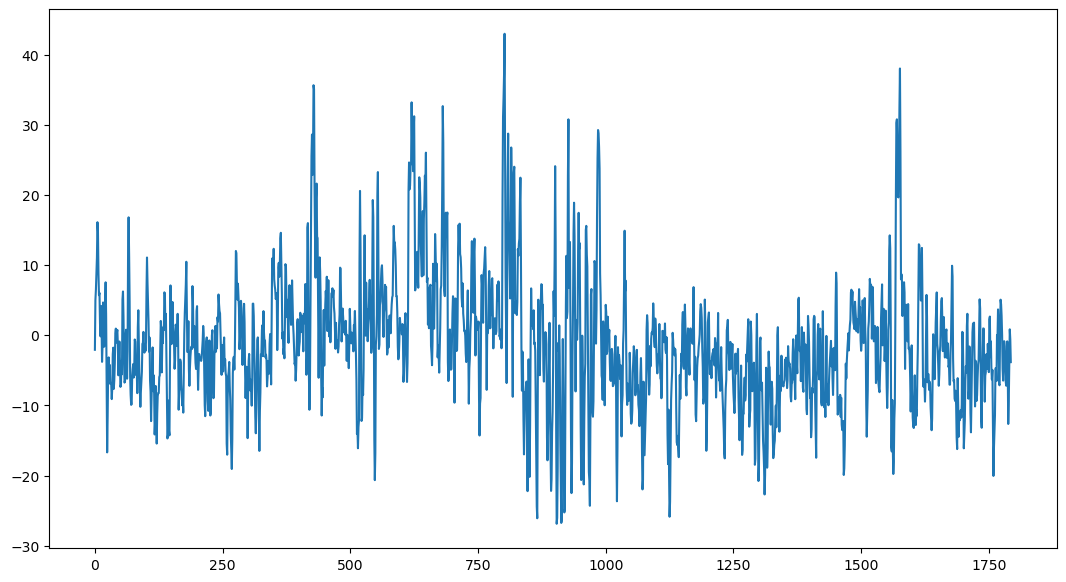

In [30]:
total_ampli = mfcc_all[19]

# ploting audio wave
figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

graph.plot(range(len(total_ampli)), total_ampli)
plt.show()